#NúPeDIA - Estudo Sobre Pandas

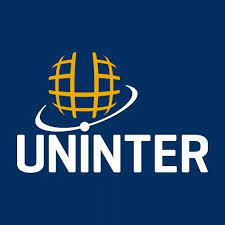 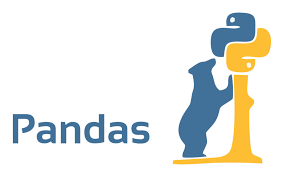 

Projeto desenvolvido em 2018 pelo **Núcleo de Pesquisa e Desenolvimento de Inteligência Artificial** (NúPeDIA) da **Uninter**, com o objetivo de construir um corretor ortográfico a partir de estudos sobre PLN (Processamento de Línguagem Natural) e redes neurais.

Esse notebook foi escrito para introduzir os alunos iniciantes sobre os primeiros passos de **Pandas** e outras técnicas de manipulação de dados, sendo uma releitura e tradução do livro [Natural Language Processing With Python](http://www.nltk.org/book "Livro Natural Language Processing With Python").

##Introdução




###Definição

Pandas (Panel Datas) é uma **biblioteca** que possibilita a análise e manipulação de dados estruturados , sendo muito utilizada na programação científica e em Machine Learn, por se tratar de ferramentas práticas e que não necessitam de outras linguagens como o R. 

Diferente do **NumPy**, o Pandas **não faz parte da instalação padrão do Python**, porém, quando utilizamos o **Anaconda**, ele é instalado automaticamente. 

###Aplicações

1.   **Manipulação de Dados:** Através de Time Series ou Data Frames, de forma rápida, ágil e com indexação integrada. 

2.   **Análise de Dados:** Ler, escrever, alinhar, marcar, fatiar (slicing), agrupar, unir, concatenar, fazer histogramas, correlações e diversas outras funções.

3.   **Áreas de Aplicação:** Mercado financeiro, Neurociência,  Economia, Estatística, Publicidade e muito mais.

###Como Importar o Pandas

Para utilizar o Pandas, é necessário importar a sua biblioteca:

In [1]:
import pandas as pd

Também é possível importar somente uma **Série** ou **Data Frame**:

In [2]:
from pandas import Series

In [3]:
from pandas import DataFrame

##Conceitos

###Series

####Introdução

É um array unidimensional que contém um array de dados e um array de labels, chamado **índices** ou **index**.

In [4]:
from pandas import Series #Lembrando que poderia ser usado import pandas as pd

Para demonstração, vamos utilizar o método **Series()** e como parâmetros os valores que queremos criar dentro da série

In [5]:
obj = Series([1, 2, 3, 4, 5])  #Criando série sem especificar os índices.

Na primeira coluna temos os **índices** criados automaticamente e na segunda os valores usados como parâmetros.

In [6]:
obj   #Imprime a série

0    1
1    2
2    3
3    4
4    5
dtype: int64

Podemos analisar que **obj** é do tipo **Series** pertencendo ao **Pandas**

In [7]:
type(obj)

pandas.core.series.Series

Também podemos exibir os valores dos parâmetros escolhidos

In [8]:
obj.values

array([1, 2, 3, 4, 5])

Percebe-se que os índices são uma série de dados que começam em 0, finalizam em 5 (esse número é o limite e não é contabilizado), com intervalo de 1 em 1.

In [9]:
obj.index

RangeIndex(start=0, stop=5, step=1)

É possível criar séries especificando os índices:

In [10]:
obj2 = Series([1, 2, 3, 4], index = ['a', 'b', 'c', 'd']) #Trocou-se os valores gerados pelo pandas por letras
obj2    #Imprime serie

a    1
b    2
c    3
d    4
dtype: int64

####Selecionando Dados

Podemos fazer a mesma análise anterior para **obj2**. 

In [11]:
type(obj2)

pandas.core.series.Series

In [12]:
obj2.values

array([1, 2, 3, 4])

In [13]:
obj2.index

Index(['a', 'b', 'c', 'd'], dtype='object')

Vamos delimitar a visualização dos dados com **técnicas de fatiamento (slice)** de forma simples:

In [14]:
obj2[obj2 > 3]  #Imprime valores da série obj2 que sejam maiores que 3

d    4
dtype: int64

In [15]:
obj2['b']       #Mostra os elementos de uma posição especifica do índice

2

In [16]:
'd' in obj2     #Confere se 'd' existe dentro do obj2 retornando valores de True ou False

True

####Séries e Dicionários

Nós podemoscriar séries utilizando dicionários, a seguir, o elemento entre aspas é considerado uma **palavra-chave** e o número após os : é um **valor** atribuído a ela. Note que as palavras-chaves tornaram-se os índices e os valores são os parâmetros da série.

In [17]:
dic = {'Futebol': 5200, 'Tenis': 120, 'Volei': 300} # Futebol (palavra-chave) : 5200 (valor)  
obj3 = Series(dic)                                  #Criando série usando um dicionário
obj3  

Futebol    5200
Tenis       120
Volei       300
dtype: int64

####Séries e Listas

O conceito explicado em dicionários também pode ser aplicado para **listas**, porém, ao definir a lista **esportes**, perceba que são listados apenas os valores desejados, sem necessitar da palavra-chave:

In [18]:
dic = {'Futebol': 5200, 'Tenis': 120, 'Volei': 300}
esportes = ['Futebol', 'Volei', 'Natação']    #Criando uma lista 
obj4 = Series(dic, index = esportes)          #Criando uma série e utilizando a lista como índice
obj4

Futebol    5200.0
Volei       300.0
Natação       NaN
dtype: float64

Comparando **obj3** com **obj4** percebe-se que existem valores **nulos**, isso ocorre porque os valores da lista não correspondem ao valores do dicionário. É necessário tomar cuidado, pois em alguns casos, os valores nulos podem ajudar ou atrapalhar a análise.


In [19]:
pd.isnull(obj4)      #Confere se existe um valor nulo. Retornando True ou False

Futebol    False
Volei      False
Natação     True
dtype: bool

In [20]:
pd.notnull(obj4)     #Comando inverso, confere se não existe valor nulo. Retorna True ou False

Futebol     True
Volei       True
Natação    False
dtype: bool

Também podemos contabilizar a quantidade de valores nulos

In [21]:
pd.isnull(obj4).sum() 

1

####Operações

Existem diversas operações que podem ser feitas com listas e dicionários, abaixo, temos alguns exemplos:

In [22]:
obj3 + obj4                   #Concatenar duas ou mais séries

Futebol    10400.0
Natação        NaN
Tenis          NaN
Volei        600.0
dtype: float64

In [23]:
obj4.name = 'populacao'       #Adicionando um nome para a Série
obj4

Futebol    5200.0
Volei       300.0
Natação       NaN
Name: populacao, dtype: float64

In [24]:
obj4.index.name = 'esportes'  #Adicionando nome para o índice
obj4

esportes
Futebol    5200.0
Volei       300.0
Natação       NaN
Name: populacao, dtype: float64

###Data Frames

Data Frames representam uma estrutura tabular semelhante a uma **planilha do Excel**, contendo uma coleção de colunas em que cada uma pode ter um tipo de valor diferente (número, string, etc). Os Data Frames possuem **index** e **linhas** e essa estrutura é muito semelhante em R.

 Os dados de um Data Frame são armazenados em um ou mais blocos bidimensionais, ao invés de listas, dicionários ou alguma outra estrutura de array. Eles são conjuntos de elementos de tipos distintos.

In [25]:
from pandas import DataFrame

   Vamos demonstrar outra maneira de criar um **dicionário**, através de **chave + lista de valores**:

In [26]:
data = {'Estado': ['Paraná', 'Bahia', 'São Paulo'], 'Ano': [1999, 2004, 1995], 'População': [4, 3, 2]}  
data

{'Estado': ['Paraná', 'Bahia', 'São Paulo'],
 'Ano': [1999, 2004, 1995],
 'População': [4, 3, 2]}

Ao utilizar o método **DataFrame()** passando o dicionário anterior como parâmetro, as **chaves** tornam-se os **títulos da coluna**, os **índices** foram gerados **automaticamente** e os elementos foram adicionados em suas respectivas chaves.

In [27]:
frame = DataFrame(data)      #Método DataFrame() usando o dicionário data como parametro
frame

,Estado,Ano,População
0,Paraná,1999,4
1,Bahia,2004,3
2,São Paulo,1995,2


Para organizar os dados, podemos alterar a ordem das colunas:

In [28]:
DataFrame(data, columns = ['Ano', 'Estado', 'População']) 

,Ano,Estado,População
0,1999,Paraná,4
1,2004,Bahia,3
2,1995,São Paulo,2


Agora vamos adicionar uma coluna, perceba que trocou-se as **labels** (rótulos) do **index**.

In [29]:
frame2 =  DataFrame(data, columns = ['Ano', 'Estado', 'População', 'Débito'], index = ['um', 'dois','tres'])
frame2

,Ano,Estado,População,Débito
um,1999,Paraná,4,NaN
dois,2004,Bahia,3,NaN
tres,1995,São Paulo,2,NaN


Para deixar mais explícito, veja a coluna adicionada.

In [30]:
frame2['Débito']  #Usando Slice (Fatiamento) e mostrando apenas a coluna Débito

um      NaN
dois    NaN
tres    NaN
Name: Débito, dtype: object

###Numpy e Pandas

Para completar as colunas que ficaram vazias, importaremos o **NumPy**:

In [31]:
import numpy as np

Cada coluna do Data Frame é um array unidimensional, nesse caso, criaremos um **array** (conjunto de elementos do mesmo tipo) utilizando o numpy, selecionando a coluna que será preenchida.

O método **arange()** cria um array com um tamanho específicado, nesse caso, selecionamos 3 posições.

In [32]:
frame2['Débito'] = np. arange(3.)
frame2['Débito']

um      0.0
dois    1.0
tres    2.0
Name: Débito, dtype: float64

Assim como explicado antes, também é possível verificar o tipo do Data Frame, selecionar colunas de modo simples, selecionar linhas, dentre muitas outras opções:

In [33]:
frame2.dtypes #Tipos dos dados de um Data Frame

Ano            int64
Estado        object
População      int64
Débito       float64
dtype: object

In [34]:
frame2['Ano'] #Exibe apenas uma coluna

um      1999
dois    2004
tres    1995
Name: Ano, dtype: int64

In [35]:
frame2.Ano    #Outra notação para exibir uma coluna

um      1999
dois    2004
tres    1995
Name: Ano, dtype: int64

In [36]:
frame2[:2]    #Selecionando todas as colunas até a linha 2

,Ano,Estado,População,Débito
um,1999,Paraná,4,0.0
dois,2004,Bahia,3,1.0


###Manipulando o Data Frame

Vamos aplicar alguns conceitos de seleção e apresentação de dados, inicialmente, vamos utilizar um dicionário:

In [37]:
dic2 = {'Dias':[1, 2, 3, 4], 'Visitantes':[12, 13, 14, 15], 'Taxas': [10, 5, 20, 15]}
df = pd.DataFrame(dic2)
df

,Dias,Visitantes,Taxas
0,1,12,10
1,2,13,5
2,3,14,20
3,4,15,15


Para considerar uma determinada **coluna** como **índice**, usamos o comando **set_index()**. Porém, é necessário ter cuidado, pois o valor inicial do índice em alguns casos, **não será zero** (como é gerado automaticamente pelo Python) e sim o **valor da coluna**. 

Esse comando, **não altera o dataframe original**, ele apenas imprime as informações considerando a mudança de index:

In [38]:
df.set_index('Dias') #Imprime o df considerando que a coluna Dias será o índice

,Visitantes,Taxas
Dias,,
1,12,10
2,13,5
3,14,20
4,15,15


In [39]:
df  # Data Frame original não foi alterado

,Dias,Visitantes,Taxas
0,1,12,10
1,2,13,5
2,3,14,20
3,4,15,15


####Visualização

Uma das partes mais importantes para a análise de dados é a sua visualização, e com certeza, você presenciará com frequência o comando **head()** que mostra os primeiros 5 elementos do seu Data Frame e do comando **tail()** que mostra os 5 últimos.

Como nosso exemplo possui poucos elementos, podemos escolher a quantidade elementos que serão exibidos

In [40]:
df.head(2)

,Dias,Visitantes,Taxas
0,1,12,10
1,2,13,5


In [41]:
df.tail(2)

,Dias,Visitantes,Taxas
2,3,14,20
3,4,15,15


Outros comandos muito úteis são:

In [42]:
df.info()      #Resume informações sobre o Data Frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Dias        4 non-null      int64
 1   Visitantes  4 non-null      int64
 2   Taxas       4 non-null      int64
dtypes: int64(3)
memory usage: 224.0 bytes


In [43]:
df.describe()     #Mostra estatísticas básicas do Data Frame (contagem, média, desvio padrão, mínimo, máximo e porcentagens dos quartis).

,Dias,Visitantes,Taxas
count,4.000000,4.000000,4.000000
mean,2.500000,13.500000,12.500000
std,1.290994,1.290994,6.454972
min,1.000000,12.000000,5.000000
25%,1.750000,12.750000,8.750000
50%,2.500000,13.500000,12.500000
75%,3.250000,14.250000,16.250000
max,4.000000,15.000000,20.000000


Em alguns casos, é necessário adicionar condições específicas para filtrar os dados, além de podermos selecioná-los em apenas uma coluna.

In [44]:
df['Dias'].head()  #Exibe os 5 primeiros elementos apenas da coluna Dias

0    1
1    2
2    3
3    4
Name: Dias, dtype: int64

Essas condições podem ser elaboradas, como o caso abaixo que exibe os 3 primeiros elementos que tenham a coluna **Dias** com valores maiores que 0.1:

In [45]:
df[df.Dias > 0.1].head(3)

,Dias,Visitantes,Taxas
0,1,12,10
1,2,13,5
2,3,14,20


Também é possível utilizar **operadores lógicos** (AND ou OR, por exemplo) para obter dados mais específicos. No exemplo abaixo estamos utilizando o operador **AND**, logo, ele exibirá todos os dados que satisfaçam as **duas condições**, retornando os valores da coluna **Dias** que sejam maiores que 0.1 **e** da coluna **Taxas** que sejam menores que 15. 

In [46]:
df[(df.Dias > 0.1) & (df.Taxas < 15)]

,Dias,Visitantes,Taxas
0,1,12,10
1,2,13,5


####Manipulação de Dados

#####Copy

Antes de realizar algumas alteração importante no Data Frame original, é importante **copiar** seus dados para evitar riscos de perdas ou quebra do código. 

In [47]:
df2 = df.copy()           #Copia o Data Frame inteiro
df2

,Dias,Visitantes,Taxas
0,1,12,10
1,2,13,5
2,3,14,20
3,4,15,15


#####Join

É possível **juntar** dois Data Frames em um só, porém, é preciso tomar cuidado, pois a **ordem** altera o resultado. Para o nosso exemplo, vamos criar dois Data Frames a partir de **frame** (Data Frame utilizado anteriormente) selecionando a coluna **Ano** e posteriormente a coluna **Estado**.

In [48]:
df3 = DataFrame(frame['Ano'])  #Copia apenas uma parte, neste caso, apenas  a coluna rSDSS
df3

,Ano
0,1999
1,2004
2,1995


In [49]:
df4 = DataFrame(frame['Estado'])
df4

,Estado
0,Paraná
1,Bahia
2,São Paulo


Ao aplicar o **join()** perceba que os Data Frames ficarão unidos em uma única tabela. Note também que a ordem dos elementos altera a visualização.

In [50]:
df5 = df3.join(df4)     #Irá mesclar o df3 ao df4
df5

,Ano,Estado
0,1999,Paraná
1,2004,Bahia
2,1995,São Paulo


In [51]:
df6 = df4.join(df3)     #Irá alterar a ordem, mesclando df4 ao df3
df6

,Estado,Ano
0,Paraná,1999
1,Bahia,2004
2,São Paulo,1995


#####Merge

Utilizado para fundir dois Data Frames, sendo **similar ao Join**, porém,  é necessário existir **uma coluna em comum** entre os dois. 

In [52]:
df7 = pd.merge(df3, df6)       #A coluna Ano existe em ambos os Data Frames
df7

,Ano,Estado
0,1999,Paraná
1,2004,Bahia
2,1995,São Paulo


###Leitura de Arquivos

O Pandas é capaz de ler diversos tipos de arquivos através do camando **read_tipodoarquivo**. Nesse documento, vamos exemplificar alguns tipos mais usados, porém, para saber mais a respeito, indicamos a leitura da documentação.



*   **read_table:** Leitura de arquivos .txt no formato ASC
*   **read_csv:** Leitura de arquivo csv (Comma Separate Value – Os dados são separados por vírgulas).
*   **read_excel:** Leitura de arquivo Excel
*   **read_sql:** Leitura de arquivos SQL (utilizado em banco de dados)
*   **read_json:** Leitura de arquivos json (Línguagem de programação Web)






Nesse exemplo, a variável **df** recebe a leitura da tabela em **nome do arquivo.txt - em forma de string (entre aspas)** e é separada pelos espaços em branco.

**Nota: Para abrir um arquivo utilizando o Google Colab, clique em Arquivos na barra lateral esquerda e selecione Fazer upload, posteriormente, escolha a pasta onde está salvo o arquivo verbos.txt**

In [53]:
df = pd.read_table('verbos.txt', delim_whitespace=True) 
df

FileNotFoundError: ignored

#####Arquivo CSV

Para criar um Data Frame a partir de um arquivo CSV utiliza-se o método **read_csv()**. Geralmente, cria-se um Data Frame com Pandas a partir de uma fonte de dados, que pode ser um arquivo CSV, banco de dados relacional, banco de dados SQL, planilha do Excel, etc.

**Nota: Para abrir um arquivo utilizando o Google Colab, clique em Arquivos na barra lateral esquerda e selecione Fazer upload, posteriormente, escolha a pasta onde está salvo o arquivo exemplo.csv**

In [ ]:
df = pd.read_csv('exemplo.csv')
df

Também é possível usar o método **read_table()**, porém, diferente do método anterior, é necessário definir qual será o separador:

**O separador também funciona no exemplo anterior**

In [ ]:
df = pd.read_table('exemplo.csv', sep = ';')  #Lê a tabela separando as colunas por ponto e vírgula virgulas.
df      

Para o comando a seguir é necessário **atenção**, pois no **Mac** e no **Linux**, ele executa as primeiras linhas do arquivo. No **Windows** é necessário escrever **!type**.


In [ ]:
!head exemplo.csv


In [ ]:
!pwd   #Exibe o diretório

Do mesmo modo que descrevemos anteriormente, podemos nomear as colunas:

In [ ]:
df = pd.read_csv('exemplo.csv', sep =';', names = ['a', 'b', 'c'])
df    

#####Converter Data Frame em Arquivo CSV

Para converter um **Data Frame** em um **arquivo CSV** é necessário importar a **biblioteca sys**.

Ela permite a utilização do método **stdout()** que converte o Data Frame para CSV e nesse caso, modificou o separador para | que separam as colunas e seus respectivos dados.

In [ ]:
type(frame)

In [ ]:
import sys
frame = frame.to_csv(sys.stdout, sep = '|') 

###Gráficos

Existem diversos tipos de gráficos, para o nosso estudo, nos focaremos em **Histogramas** que são utilizados para dados que contenham um **rótulo** e um **valor**. Antes de tudo, é necessário importar a biblioteca **matplotlib** que possibilita a manipulação e criação dessas representações:

In [ ]:
import matplotlib.pyplot as plt   # Importa a biblioteca matplotlib
frame2.hist()                        #Método para criar histogramas
plt.show()                        #Comando do matplotlib para exibir o gráfico

Para criar o histograma de apenas uma coluna, utilizamos:

In [ ]:
frame2['Ano'].hist()    #Cria um histograma da coluna rSDSS
plt.show()            

Também podemos fazer um histograma da coluna **Ano** selecionando a quantidade de barras, refinando e melhorando o design do gráfico.

In [ ]:
frame2['Ano'].hist(bins=5) 

###Correlação entre Dados

A correlação é uma ferramenta estatística que ajuda a ter uma visão geral dos dados que possuem algo em comum.

In [ ]:
frame2.corr()   # Correlaciona todo o Data Frame

In [ ]:
frame2['Ano'].corr(frame2['População'])   #Correlaciona colunas específicas, nesse caso, entre Ano e População

##Conclusão

Esse notebook apresentou uma introdução sobre conceitos importantes de manipulação e organização de dados. Esses assuntos estão presentes em áreas da computação como: Data Science, Machine Learn, Análise de Sistemas, dentre muitos outros. Espero que tenha te ajudado a dar os primeiros passos e que estimule a sua criatividade e curiosidade durante o seu processo de aprendizado.